## Отели и авиабилеты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Загрузка данных
df = pd.read_csv('D:\dano_dataset_travel.csv', sep=';')

C:\Users\galin\AppData\Local\Temp\ipykernel_2140\3988847142.py:2: DtypeWarning: Columns (31,32,33,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\dano_dataset_travel.csv', sep=';')


In [3]:
print("Размер датасета:", df.shape)
print("\nИнформация о данных:")
df.info()

Размер датасета: (835938, 56)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835938 entries, 0 to 835937
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   order_online_payment_flg     786885 non-null  object 
 1   account_rk                   835938 non-null  object 
 2   client_rk                    835938 non-null  object 
 3   order_rk                     835938 non-null  object 
 4   loyalty_program_type_nm      754957 non-null  object 
 5   bundle_nm                    588049 non-null  object 
 6   order_type_cd                786885 non-null  object 
 7   order_status_cd              779514 non-null  object 
 8   party_first_order_dt         786885 non-null  object 
 9   party_first_order_type_dt    786767 non-null  object 
 10  free_cancel_booking_dttm     75600 non-null   object 
 11  created_dttm                 786885 non-null  object 
 12  cancel

Посмотрик как выглядят данные

In [4]:
df.head()

,order_online_payment_flg,account_rk,client_rk,order_rk,loyalty_program_type_nm,bundle_nm,order_type_cd,order_status_cd,party_first_order_dt,party_first_order_type_dt,...,last_used_product_cd,first_used_product_cd,mobile_phone_operator_nm,marital_status_cd,education_level_cd,birth_place,gender_cd,last_sms_dt,last_email_send_dt,last_session_dttm
0,"1,0",209c833731e84d21b5b7e673e0fb848749b9e7d29cda64...,f4959ffb27271192727050953ecb27a8a8a38af413f3d8...,fe1c6ce13774d102c655df4c01d54c34d495ef3d4c7e63...,Bravo,Pro,AIR,SUC,2019-12-12,2019-12-12,...,MPL,MPL,Тинькофф Мобайл,NaN,NaN,ГОР ЯРОСЛАВЛЬ,M,2024-07-02,NaN,2024-11-06 19:42:52.000000
1,"1,0",2bbcde706bead3731f2dc8dfbeefb4e12b42ac63e3d8ba...,7025587bc277176246bc44dff396036552a41d5a92d6aa...,98cb83b7748cdf77e43a50f56335a376b51fb767893303...,Tinkoff Black Premium,Premium,HOT,SUC,2019-11-21,2023-09-20,...,INV,IBN,TELE2,MAR,GRD,Р П ВЛАДИМИР 30,M,2024-06-26,NaN,2024-11-06 23:36:38.000000
2,"1,0",a82919af3a5a1869f9becdcffa5c7d303d105797ce45b8...,0368b36ccd204d631305233a1f952bc5fb0e3fd9f690fa...,1bfb05606a8b16d48121b9f128889cc1d198c87d223a1b...,Tinkoff Black Premium,Premium,AIR,SUC,2023-01-01,2023-01-01,...,MPL,MPL,Скартел,UNM,GRD,ГОРОД АБАКАН РЕСПУБЛИКИ ХАКАСИЯ,M,2024-07-15,NaN,2024-11-06 11:30:31.000000
3,"1,0",9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,1346344779d7bd788d03ec2ad1908daf71c6358aca47f1...,011a98649e7a2be3027ec27c1f0b0cb5dd5d82dda2f482...,NaN,Premium,HOT,NaN,2023-12-18,2023-12-18,...,MPL,MPL,Билайн,NaN,NaN,Г СТОКГОЛЬМ ШВЕЦИЯ,M,2024-06-25,NaN,2024-11-06 15:33:18.000000
4,"1,0",3133e7ae6698dcda9754d6a8b449782320260ff1259547...,1a2a4351a96099f9e49bbe2fc7236d41ac63b444176058...,b5e7909d8d7b902e4cdf268ebcbef6820c10b0ed75614b...,Tinkoff Black Premium,Premium,AIR,SUC,2019-02-18,2019-02-18,...,MPL,MPL,МегаФон,MAR,GRD,ГОР. МОСКВА,M,2024-07-15,2012-04-19,2024-11-06 23:42:28.000000


Посмотрим сколько данных нет в таблице. 

Можно заметить, что очень много пустых значений. Можно выделить, что ни один заказ небыл отменен в этом дата сете, поэтому рассматривать успешность заказов нет смысла.

In [5]:
missing_stats = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_stats / len(df) * 100).round(2)

missing_df = pd.DataFrame({'Пропущено': missing_stats, 
                           'Процент': missing_percentage})

print("Топ-15 полей по пропускам:")
missing_df.head(15)

Топ-15 полей по пропускам:


,Пропущено,Процент
cancel_dttm,835938,100.00
call_contact_1m_flg,835667,99.97
call_contact_3m_flg,835667,99.97
call_contact_6m_flg,835667,99.97
good_email_address_flg,816140,97.63
bad_email_address_flg,816140,97.63
last_email_send_dt,816140,97.63
bounce_cd,796263,95.25
free_cancel_booking_dttm,760338,90.96
hotel_country,673690,80.59


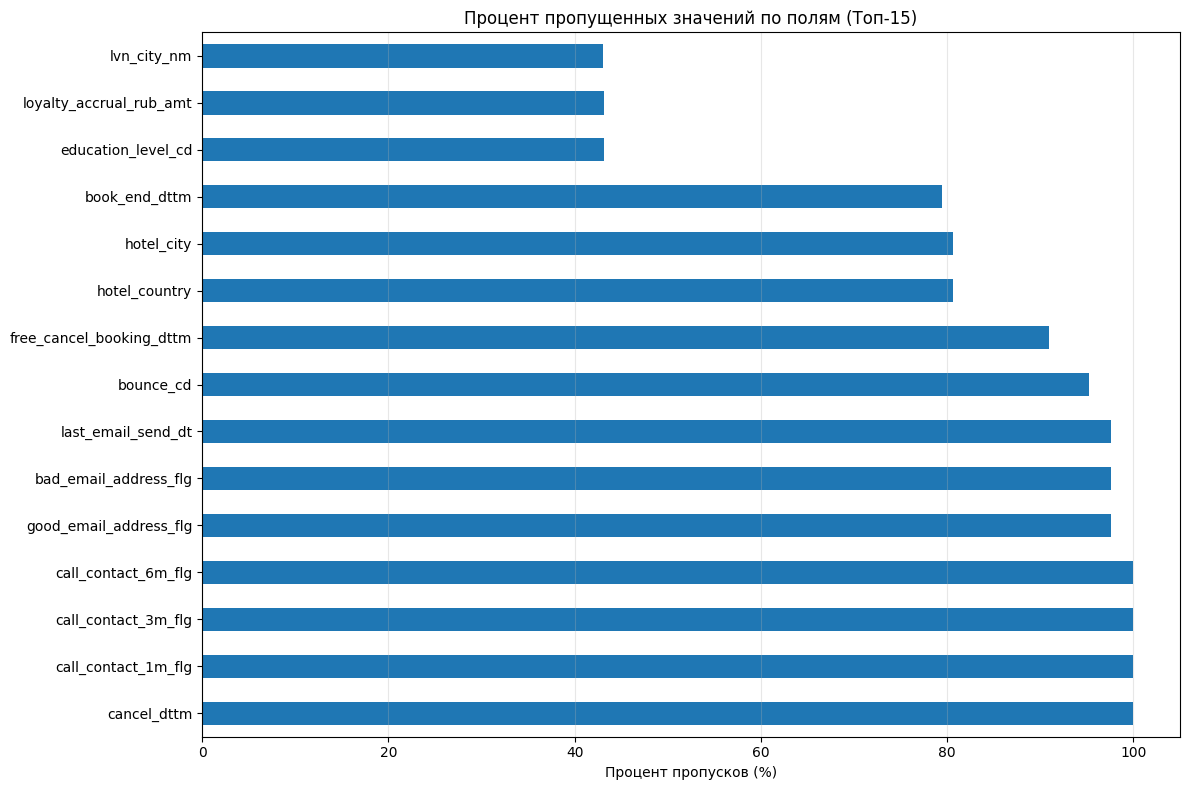

In [6]:
plt.figure(figsize=(12, 8))
missing_df[missing_df['Пропущено'] > 0].head(15)['Процент'].plot(kind='barh')
plt.title('Процент пропущенных значений по полям (Топ-15)')
plt.xlabel('Процент пропусков (%)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Анализ целевых переменных - продукт и статус заказа

In [8]:
# Распределение по типам продуктов
product = df['order_type_cd'].value_counts()
print("Распределение по типам продуктов:")
print(product)

# Распределение по статусам заказов
status = df['order_status_cd'].value_counts()
print("\nРаспределение по статусам заказов:")
print(status)

# Анализ подписок
bundle = df['bundle_nm'].value_counts()
print("\nРаспределение по типам подписок:")
print(bundle)

Распределение по типам продуктов:
order_type_cd
AIR    615337
HOT    171548
Name: count, dtype: int64

Распределение по статусам заказов:
order_status_cd
SUC    759950
PRC     18467
ERR       650
NSH       304
CNC        84
REJ        58
BRN         1
Name: count, dtype: int64

Распределение по типам подписок:
bundle_nm
Premium            292078
Pro                286277
Private              8364
Team Premium          824
Team Select           271
Team Pro              150
Team Private           37
Tinkoff Premium        25
Tinkoff Pro            23
Name: count, dtype: int64


Люди активно покупают авиабилеты, но отели предпочитают бронировать у конкурентов.

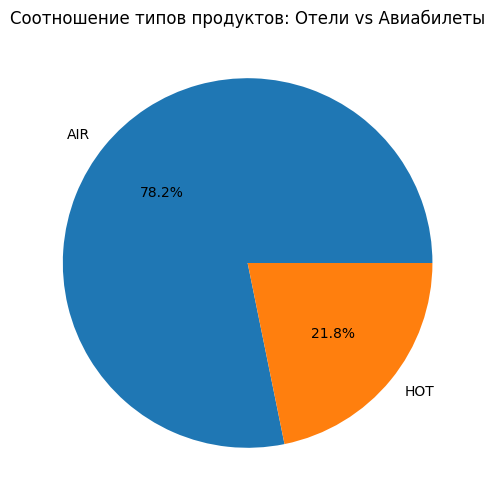

In [9]:
plt.figure(figsize=(8, 6))
df['order_type_cd'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Соотношение типов продуктов: Отели vs Авиабилеты')
plt.ylabel('')
plt.show()

Посмотрим демографические характеристики.

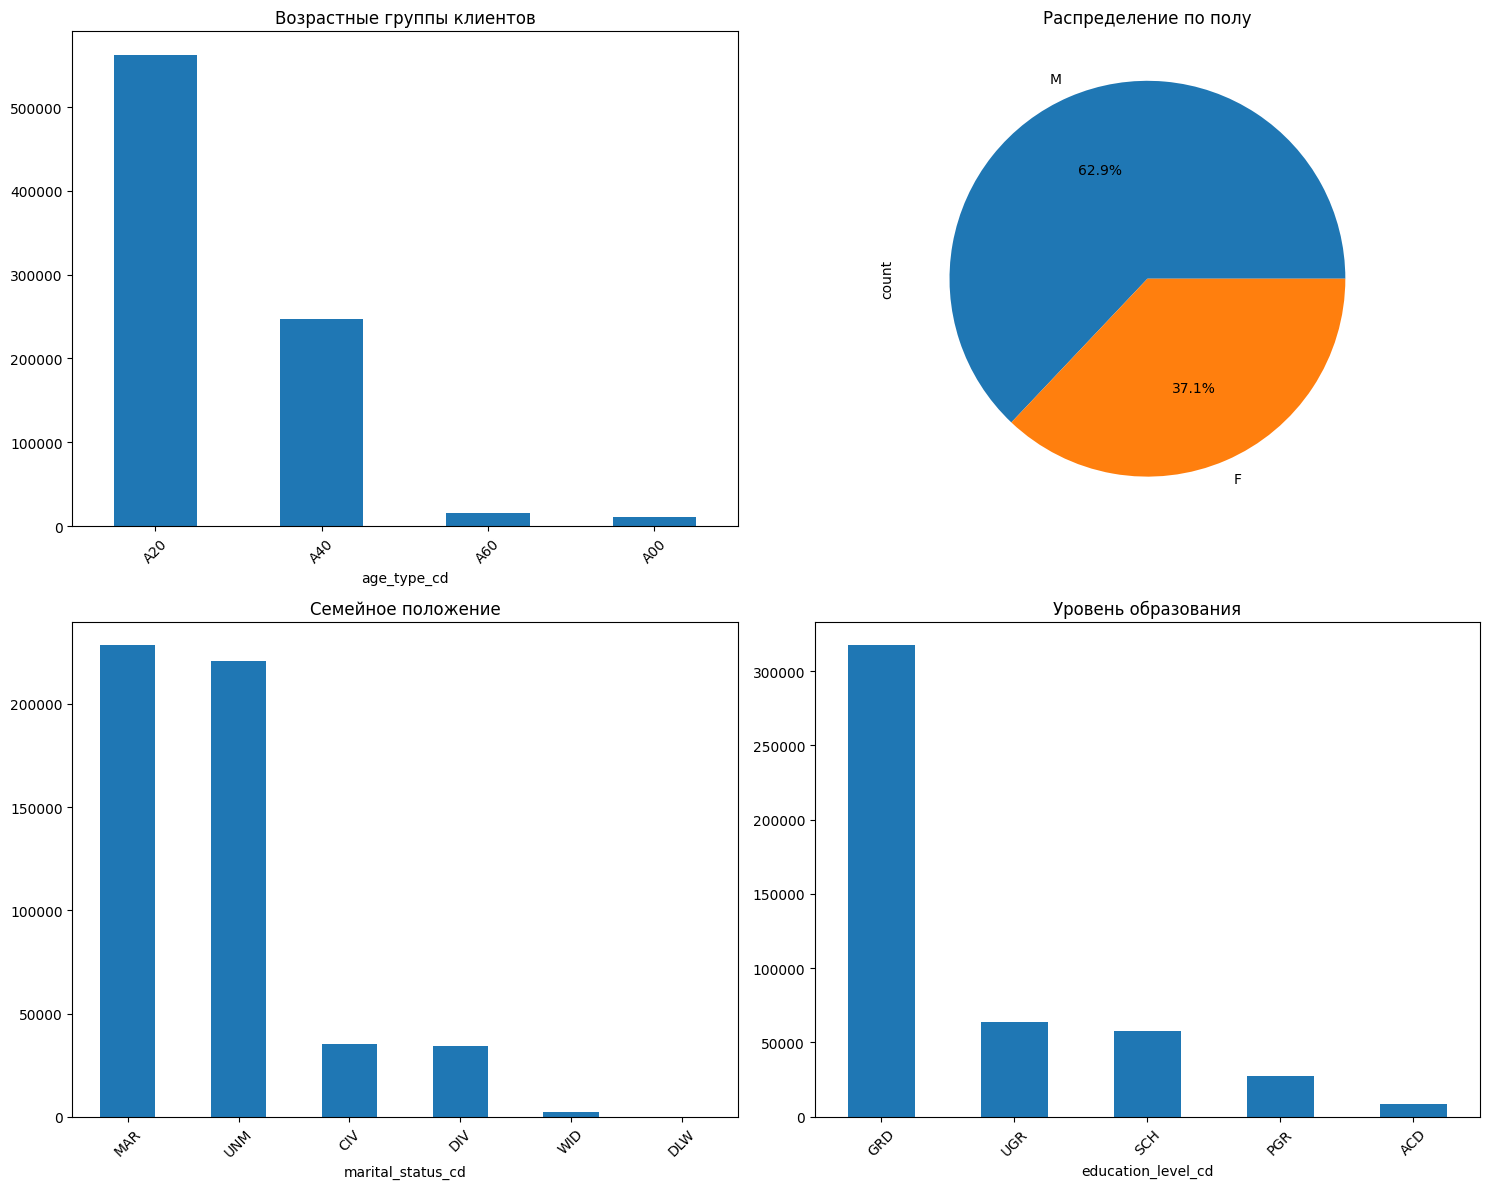

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Возрастные группы
df['age_type_cd'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Возрастные группы клиентов')
axes[0,0].tick_params(axis='x', rotation=45)

# Пол
df['gender_cd'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0,1])
axes[0,1].set_title('Распределение по полу')

# Семейное положение
df['marital_status_cd'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Семейное положение')
axes[1,0].tick_params(axis='x', rotation=45)

# Уровень образования
df['education_level_cd'].value_counts().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Уровень образования')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Какое самое популярное направление - Москва

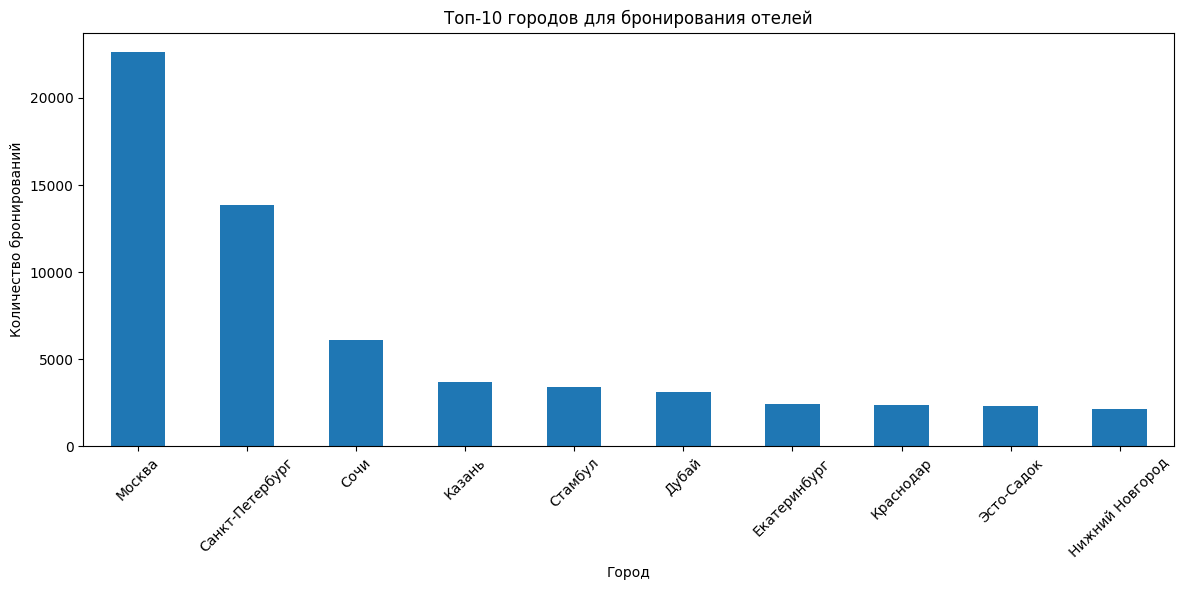

In [14]:
plt.figure(figsize=(12, 6))
top_cities = df['hotel_city'].value_counts().head(10)
top_cities.plot(kind='bar')
plt.title('Топ-10 городов для бронирования отелей')
plt.xlabel('Город')
plt.ylabel('Количество бронирований')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

А куда самое популярное напрваление из Москвы тогда? Питер, Сочи. Вполне себе реально.

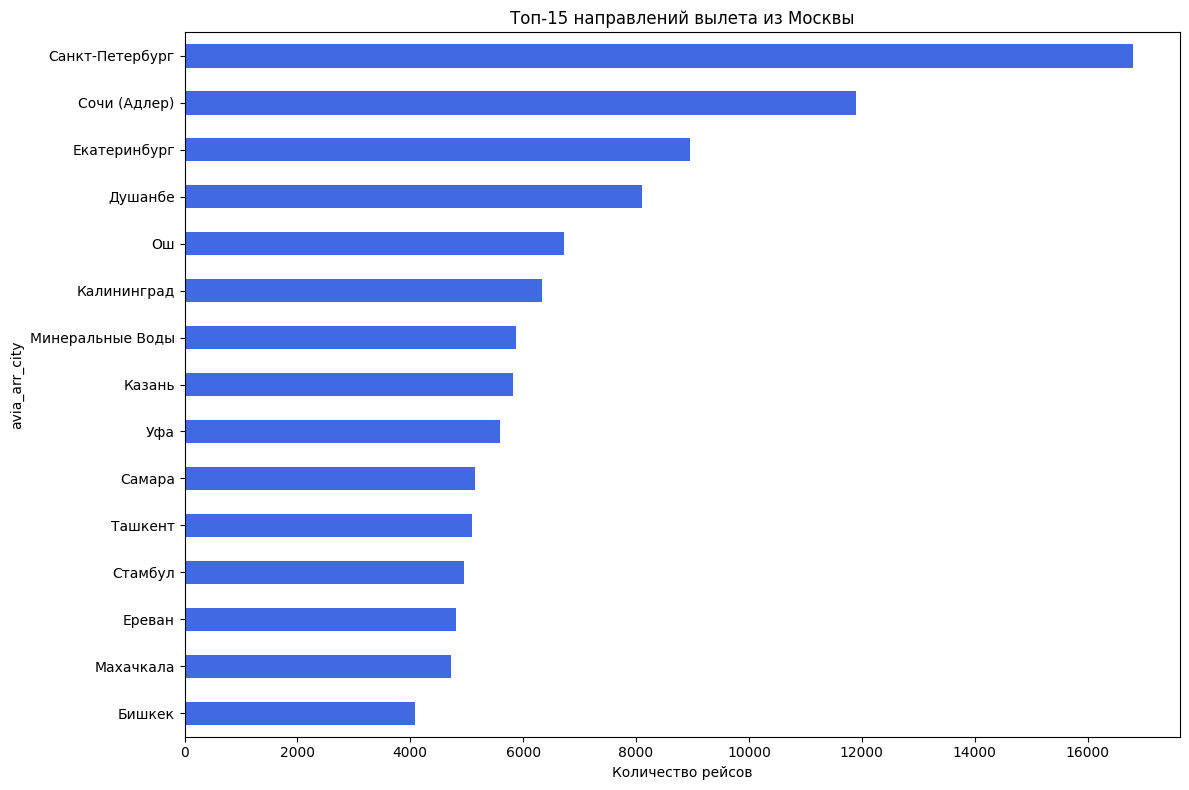

In [16]:
moscow_departures = df[(df['avia_dep_city'] == 'Москва') & 
                      (df['avia_arr_city'].notna())]
top_moscow_destinations = moscow_departures['avia_arr_city'].value_counts().head(15)

plt.figure(figsize=(12, 8))
top_moscow_destinations.plot(kind='barh', color='royalblue')
plt.title('Топ-15 направлений вылета из Москвы')
plt.xlabel('Количество рейсов')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('moscow_destinations.png', dpi=300, bbox_inches='tight')
plt.show()

Проанализируем цены.

Средняя стоимость заказа составляет примерно 15000, что говорит о преобладании эконом сегмента и среднего сегмента. 

Так же можно заметить, что клиенты мало вовлечены в использование промокодов.

In [15]:
# Анализ цен
df['nominal_price_rub_amt'] = pd.to_numeric(df['nominal_price_rub_amt'].str.replace(',', '.'), errors='coerce')
df['promo_code_discount_amt'] = pd.to_numeric(df['promo_code_discount_amt'].str.replace(',', '.'), errors='coerce')

print("Статистика по ценам (RUB):")
print(f"Средний чек: {df['nominal_price_rub_amt'].mean():.2f} руб.")
print(f"Медианный чек: {df['nominal_price_rub_amt'].median():.2f} руб.")
print(f"Максимальный чек: {df['nominal_price_rub_amt'].max():.2f} руб.")

print("\nСтатистика по скидкам:")
print(f"Процент заказов со скидкой: {(df['promo_code_discount_amt'] > 0).mean()*100:.1f}%")
print(f"Средний размер скидки: {df[df['promo_code_discount_amt'] > 0]['promo_code_discount_amt'].mean():.2f} руб.")

Статистика по ценам (RUB):
Средний чек: 15178.10 руб.
Медианный чек: 9342.00 руб.
Максимальный чек: 2025808.00 руб.

Статистика по скидкам:
Процент заказов со скидкой: 0.9%
Средний размер скидки: 434.83 руб.


Как видим, многие выбирают варианты подешевле

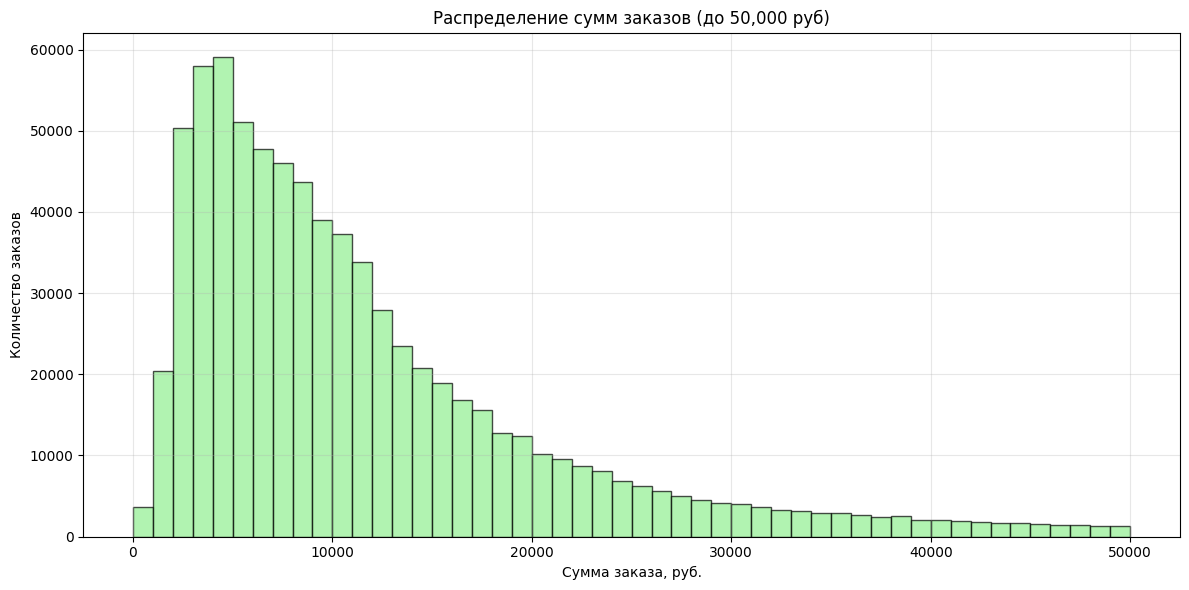

In [17]:
plt.figure(figsize=(12, 6))
plt.hist(df[df['nominal_price_rub_amt'] < 50000]['nominal_price_rub_amt'], 
         bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Распределение сумм заказов (до 50,000 руб)')
plt.xlabel('Сумма заказа, руб.')
plt.ylabel('Количество заказов')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Посмотрим на сколько активны клиенты

Статистика по активности клиентов:
Среднее количество заказов на клиента: 5.63
Медианное количество заказов: 4.00
Максимальное количество заказов: 359


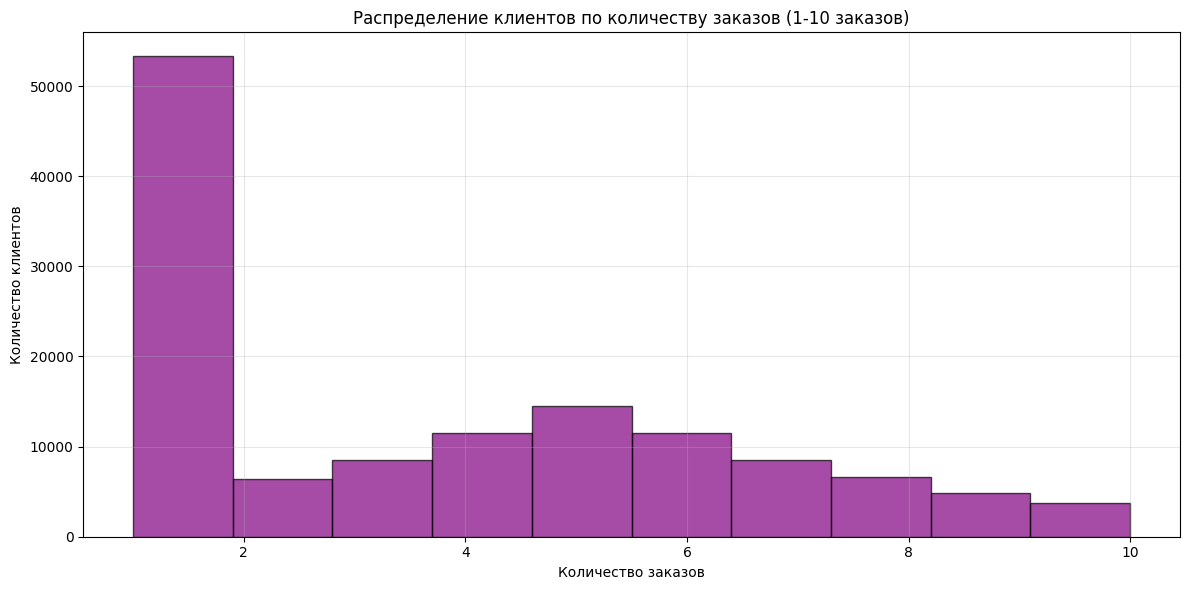

In [20]:
# Активность клиентов
client_activity = df['client_rk'].value_counts()
print("Статистика по активности клиентов:")
print(f"Среднее количество заказов на клиента: {client_activity.mean():.2f}")
print(f"Медианное количество заказов: {client_activity.median():.2f}")
print(f"Максимальное количество заказов: {client_activity.max()}")

# Распределение активности
plt.figure(figsize=(12, 6))
plt.hist(client_activity[client_activity <= 10], bins=10, alpha=0.7, color='purple', edgecolor='black')
plt.title('Распределение клиентов по количеству заказов (1-10 заказов)')
plt.xlabel('Количество заказов')
plt.ylabel('Количество клиентов')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('client_activity.png', dpi=300, bbox_inches='tight')
plt.show()

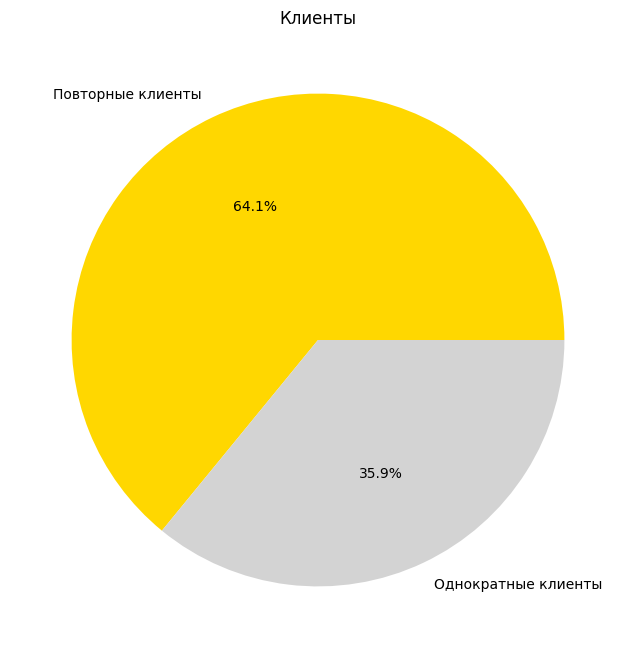

In [36]:
client_order_count = df['client_rk'].value_counts()
repeat_clients = (client_order_count > 1).sum()
repeat_rate = repeat_clients / df['client_rk'].nunique() * 100
repeat_data = [repeat_rate, 100 - repeat_rate]
labels = ['Повторные клиенты', 'Однократные клиенты']
colors = ['gold', 'lightgrey']

plt.figure(figsize=(8, 8))
plt.pie(repeat_data, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Клиенты')
plt.savefig('repeat_customers.png', dpi=300, bbox_inches='tight')
plt.show()

Когда чаще всего бронируют? Точно не зимой. Июнь - август показывают самый высокий спрос. В ноябре перед зимой резкий спад. Но в январе на праздники опять появляется спрос.

In [31]:
df['created_dttm'] = pd.to_datetime(df['created_dttm'], errors='coerce')

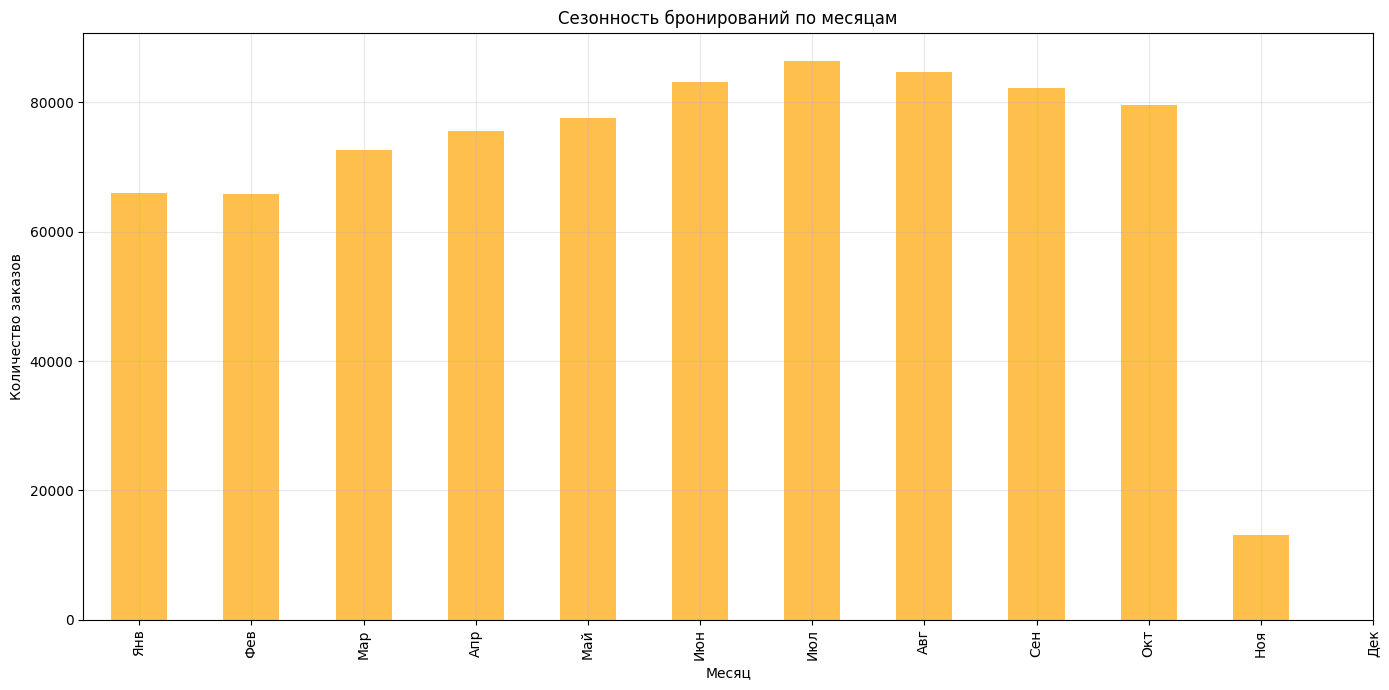

In [33]:
df['booking_month'] = df['created_dttm'].dt.month

monthly_orders = df['booking_month'].value_counts().sort_index()
plt.figure(figsize=(14, 7))
monthly_orders.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Сезонность бронирований по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(12), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
                      'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('seasonality.png', dpi=300, bbox_inches='tight')
plt.show()